<a href="https://colab.research.google.com/github/arbin34/Longchain/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Datas

[ ]
et - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 188MB/s]
100% 1.06G/1.06G [00:07<00:00, 150MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d/content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
os.listdir('/content/dogs_vs_cats/train')

['cats', 'dogs']

In [ ]:
import numpy as np
import random


random.sample(os.listdir('/content/dogs_vs_cats/train'),5)

In [ ]:
os.path.join("/content/dogs_vs_cats/train/cats/",'cat.0.jpg')

'/content/dogs_vs_cats/train/cats/cat.0.jpg'

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
random.sample(os.listdir('/content/dogs_vs_cats/train/cats'),1)

['cat.9382.jpg']

In [ ]:
def plot_image_from_irectory(directory_path,class_animal,num_images=9):
  image_filenames=os.listdir(directory_path)
  if(len)(image_filenames)<num_images:
    print(f"ONLY {len(image_filenames)} ARE AVAILABLE AT {directory_path}")
    num_images=len(image_filenames)
  random_image=random.sample(image_filenames,num_images)
  fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(8,8))
  axes=axes.ravel()
  for i,filename in enumerate(random_image):
    img=os.path.join(directory_path,filename)
    img=Image.open(img)
    axes[i].imshow(img)
    axes[i].set_title(f"image:{class_animal}")
    axes[i].axis('off')
  fig.tight_layout()
  plt.show()

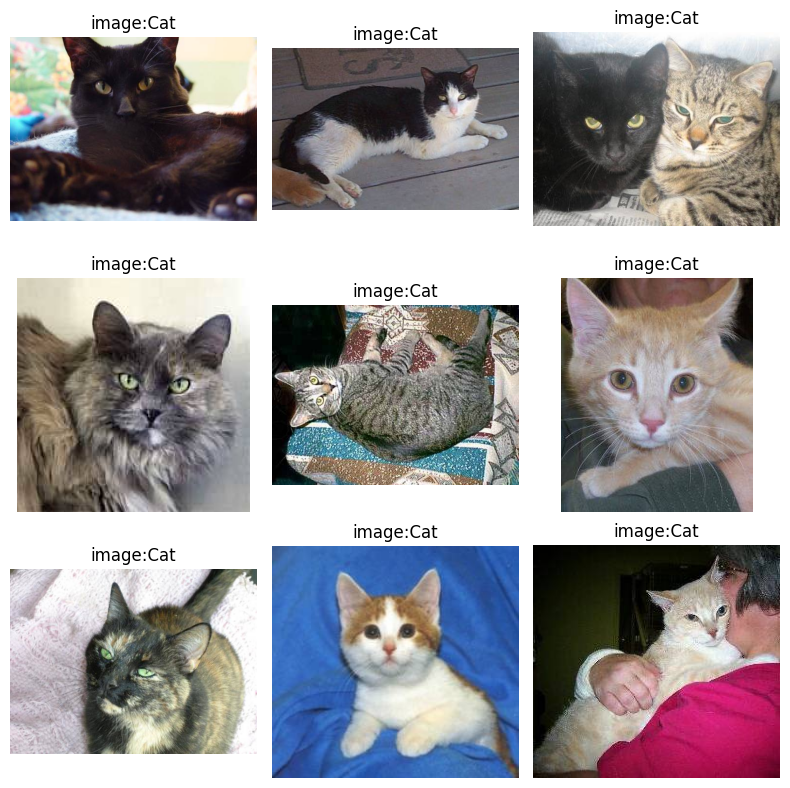

In [ ]:

cat_directory='/content/dogs_vs_cats/train/cats'
plot_image_from_irectory(cat_directory,'Cat')

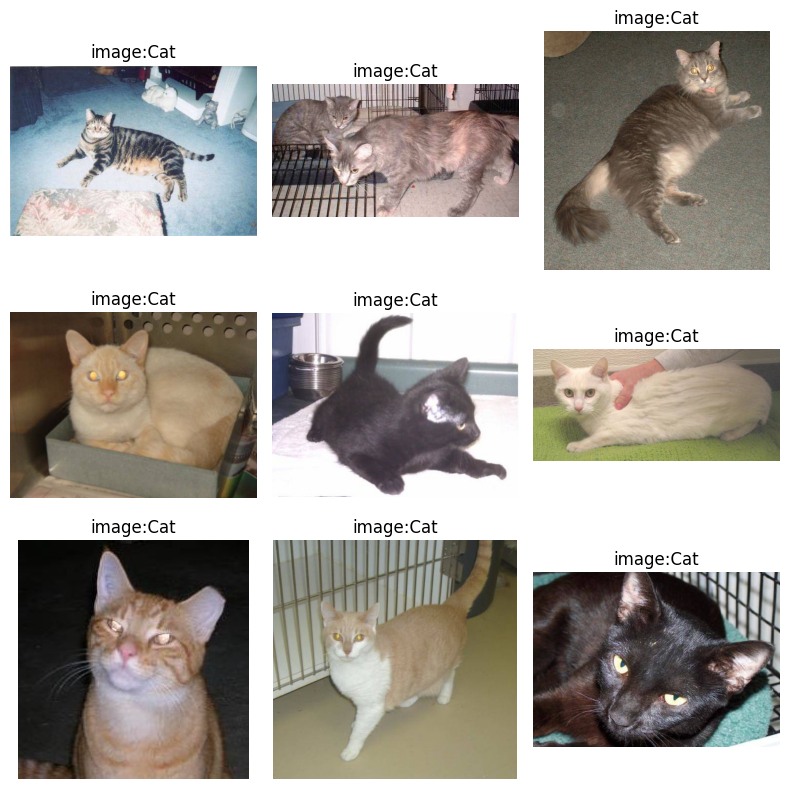

In [ ]:
dogs_directory='/content/dogs_vs_cats/train/dogs'
plot_image_from_irectory(cat_directory,'Cat')

In [ ]:
cat_image=os.listdir(cat_directory)
dog_image=os.listdir(dogs_directory)
class_animals= ['cats','dogs  ']
count=[len(cat_image),len(dog_image)]
print(count)

[10000, 10000]


In [ ]:
import os
import cv2
import imghdr
img_exts= ['jpeg','jpg','png']
data_dir='/content/dogs_vs_cats'
for root,dirs,files in os.walk(data_dir):
  for file in files:
    file_path=os.path.join(root,file)

    try:
      #check the file type of current filr

      file_type=imghdr.what(file_path)
      #if the file extension is not in allowed list ,remove it
      if file_type not in img_exts:
        print('Image not in ext list {}'.format(file_path))
        os.remove(file_path)
      else:
        #proceed to process the image if needed for example ,reading it with openCV
          img=cv2.imread(file_path)

    except Exception as e:
      print(f'isssue with file{file_path},Error:{e}')
      os.remove(file_path)

In [ ]:
import numpy as np
from PIL import Image
import os
def image_to_arry(image_path):
  """read an image and convert it to numpy array
  parmeters:
  image_path (str): the path to the image file.
  returns:
  np.array:the image as a numpy array."""
  try:
    with Image.open(image_path) as img:
      img_array=np.array(img)
      return img_array
  except Exception as e:
    print(f"Error reading image {image_path}.")
    return None


array([[[224, 225, 220],
        [223, 224, 219],
        [223, 224, 219],
        ...,
        [245, 242, 249],
        [245, 242, 249],
        [245, 242, 249]],

       [[222, 223, 218],
        [222, 223, 218],
        [223, 224, 219],
        ...,
        [246, 245, 251],
        [247, 244, 251],
        [247, 244, 251]],

       [[220, 221, 216],
        [221, 222, 217],
        [221, 222, 217],
        ...,
        [247, 246, 252],
        [248, 247, 253],
        [248, 247, 253]],

       ...,

       [[214, 214, 224],
        [214, 217, 224],
        [211, 214, 219],
        ...,
        [217, 212, 209],
        [217, 211, 211],
        [217, 211, 211]],

       [[211, 215, 224],
        [213, 218, 224],
        [210, 215, 221],
        ...,
        [217, 212, 209],
        [217, 211, 211],
        [217, 211, 211]],

       [[211, 215, 224],
        [213, 218, 224],
        [210, 215, 221],
        ...,
        [217, 212, 209],
        [217, 211, 211],
        [217, 211, 211]]], dtype=uint8)
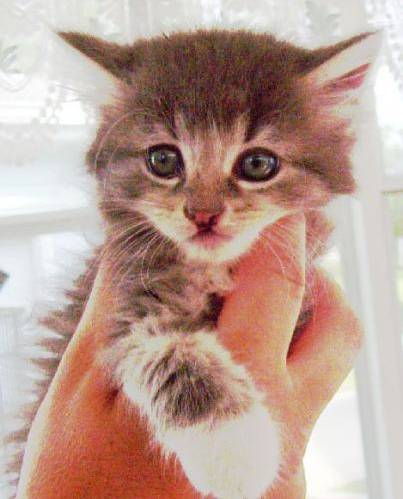

In [ ]:
image_to_arry('/content/dogs_vs_cats/train/cats/cat.100.jpg')

In [ ]:
import cv2
img=cv2.imread('/content/dogs_vs_cats/train/cats/cat.100.jpg')
if img is not None:
  print(img)
  print(img.shape)

[[[220 225 224]
  [219 224 223]
  [219 224 223]
  ...
  [249 242 245]
  [249 242 245]
  [249 242 245]]

 [[218 223 222]
  [218 223 222]
  [219 224 223]
  ...
  [251 245 246]
  [251 244 247]
  [251 244 247]]

 [[216 221 220]
  [217 222 221]
  [217 222 221]
  ...
  [252 246 247]
  [253 247 248]
  [253 247 248]]

 ...

 [[224 214 214]
  [224 217 214]
  [219 214 211]
  ...
  [209 212 217]
  [211 211 217]
  [211 211 217]]

 [[224 215 211]
  [224 218 213]
  [221 215 210]
  ...
  [209 212 217]
  [211 211 217]
  [211 211 217]]

 [[224 215 211]
  [224 218 213]
  [221 215 210]
  ...
  [209 212 217]
  [211 211 217]
  [211 211 217]]]
(499, 403, 3)


reading the image using python

In [ ]:
 import numpy as ap
 from PIL import Image
 #load  the image with pil and convert to numpy aray
 img_pil=Image.open('/content/dogs_vs_cats/train/cats/cat.100.jpg')
 img_array=np.array(img_pil)
 print(img_array)
 print(img_array.shape)

[[[224 225 220]
  [223 224 219]
  [223 224 219]
  ...
  [245 242 249]
  [245 242 249]
  [245 242 249]]

 [[222 223 218]
  [222 223 218]
  [223 224 219]
  ...
  [246 245 251]
  [247 244 251]
  [247 244 251]]

 [[220 221 216]
  [221 222 217]
  [221 222 217]
  ...
  [247 246 252]
  [248 247 253]
  [248 247 253]]

 ...

 [[214 214 224]
  [214 217 224]
  [211 214 219]
  ...
  [217 212 209]
  [217 211 211]
  [217 211 211]]

 [[211 215 224]
  [213 218 224]
  [210 215 221]
  ...
  [217 212 209]
  [217 211 211]
  [217 211 211]]

 [[211 215 224]
  [213 218 224]
  [210 215 221]
  ...
  [217 212 209]
  [217 211 211]
  [217 211 211]]]
(499, 403, 3)


Model building

In [ ]:
#set path to the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir='/content/dogs_vs_cats'
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),  #resize the image
    batch_size=20,
    class_mode='binary',#since we use binary crossentropy loss
    subset='training' #set as training data
)
validation_generatorr=train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
train_class_labels=train_generator.class_indices
print("training class labels :",train_class_labels)
validation_class_labels=validation_generatorr.class_indices
print("validation class labels :",validation_class_labels)


training class labels : {'test': 0, 'train': 1}
validation class labels : {'test': 0, 'train': 1}


In [ ]:
DEF PLOT

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=4,validation_data=validation_generatorr)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.7526 - loss: 1.8052 - val_accuracy: 0.7962 - val_loss: 0.5347
Epoch 2/4
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.7978 - loss: 0.5240 - val_accuracy: 0.7996 - val_loss: 0.5208
Epoch 3/4
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.7949 - loss: 0.5159 - val_accuracy: 0.7912 - val_loss: 0.5291
Epoch 4/4
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.7918 - loss: 0.5838 - val_accuracy: 0.8000 - val_loss: 0.5084


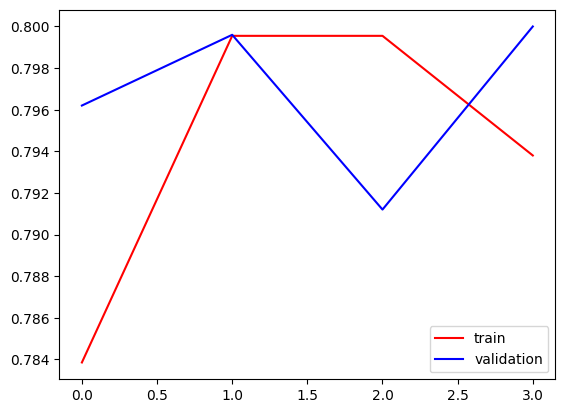

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

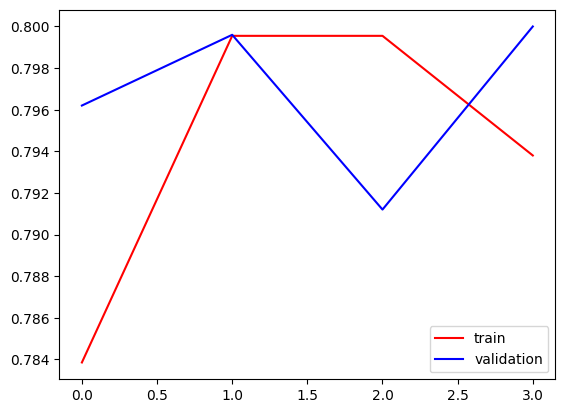

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

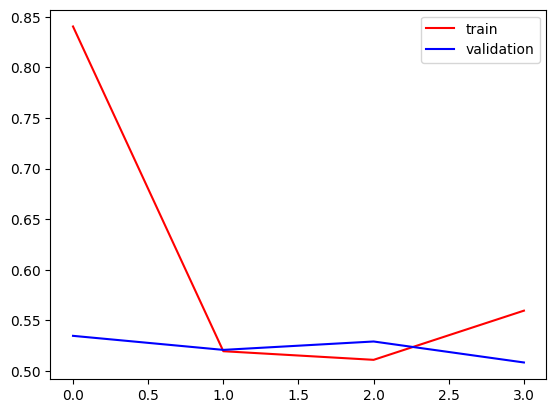

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

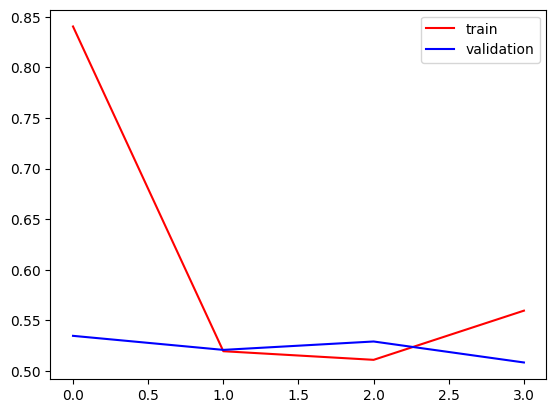

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
import cv2

# Load the image
image = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10001.jpg')

# Check if the image is loaded
if image is None:
    print("Error: Image not loaded. Check the file path or format.")
else:
    # Proceed with resizing
    resized_image = cv2.resize(image, (150,150))

In [ ]:
try:
    img = Image.open(resized_image)
    test_img = np.array(img)
except Exception as e:
    print(f"Error loading image: {e}")

Error loading image: 'numpy.ndarray' object has no attribute 'read'


In [ ]:
 img_pil=Image.open('/content/dogs_vs_cats/train/cats/cat.100.jpg')
 img_array=np.array(img_pil)
 test_input = img_array.reshape((1, 256, 256, 3))


In [ ]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

input_layer = Input(shape=(150, 150, 3))
x = Conv2D(32, (3, 3))(input_layer)
output_layer = x  # or any other layer you want as output

model = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
model2=tf.keras.Model(input=model.inputs,outputs=model.layers[1].output)



In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

# Define a simple model
input_layer = Input(shape=(150, 150, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
output_layer = x

model = Model(inputs=input_layer, outputs=output_layer)

# Print model summary to understand the layers
model.summary()

# Create a new model from the original model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Print the summary of the new model
model2.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
image=load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg",target_size=(150,150))
image=img_to_array(image)
image=image.reshape((1,150,150,3))

In [ ]:
feature=model2.predict(image)

In [ ]:
test_generator.reset()
true_classes=test_generator.classes
probabilities=model.predict(test_generator,steps=np.ceil(test_generator.samples/test_generator.batch_size))
predicted_classes=(probabilities>0.5).astype(int).squeeze()
class_labels=list[test_generator.class_indices.key()]

In [ ]:
cm=confusion_matrix[true_classes,predicted_classes]
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=true,fmt='d',cmap='blues',xticklabels=class_labels,yticklabels=class_labels)
plt.show()

In [ ]:
def make_prediction(image_path):
  img=load_img(img_path,target_size=(150,150))
  img_array=img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array/=255
  prediction=model.predict(img_array)
  print(prediction)

  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.title("original image")
  plt.axis('off')


  plt.subplot(1,2,2)
  if prediction[0][0]>0.5:
    plt.title('prediction_dog')
  else:
    plt.title('prediction_cat')
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
img_path=
make_prediction(img_path)